# Análise Preditiva com Dados Espaciais em Python

---

## Sumário


1. [Introdução à Análise Exploratória de Dados Espaciais (AEDE)](#1-introdução-à-análise-exploratória-de-dados-espaciais-aede)
2. [Carregando o Conjunto de Dados](#2-carregando-o-conjunto-de-dados)
3. [Análise Exploratória de Dados Espaciais (AEDE)](#3-análise-exploratória-de-dados-espaciais-aede)
4. [Modelagem Preditiva com Dados Espaciais](#4-modelagem-preditiva-com-dados-espaciais)
5. [Exercícios](#5-exercícios)


---

In [1]:
import warnings

# filter out all warnings
warnings.filterwarnings("ignore")

## 1. Introdução à Análise Exploratória de Dados Espaciais (AEDE)

A Análise Exploratória de Dados Espaciais (AEDE) ajuda a identificar padrões e relações em dados que possuem uma dimensão geográfica. Aqui estão os conceitos principais:


- **Dados Espaciais**: Dados com referência geográfica, como coordenadas.
- **Autocorrelação Espacial**: A tendência de locais próximos apresentarem valores semelhantes, indicando padrões espaciais.
- **Heterogeneidade Espacial**: Variações espaciais nos dados que revelam padrões locais importantes.
- **Visualização Espacial**: Uso de mapas e gráficos para ilustrar e analisar a distribuição espacial dos dados.

## 2. Carregando o Conjunto de Dados

Vamos utilizar o dataset de bairros de São Francisco, disponível através do pacote `geopandas` e acessado via a biblioteca `gpd.datasets`. Esse conjunto inclui informações geoespaciais, como área e população estimada.

In [2]:
import geopandas as gpd

columns = ["POP_EST", "GDP_MD", "CONTINENT", "NAME_PT", "geometry"]
gdf = gpd.read_file("ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")[columns]

In [3]:
gdf = gdf[gdf["CONTINENT"].isin(["North America", "South America"])]
gdf.columns = ["populacao", "pib", "continente", "pais", "geometry"]
gdf["pib_per_capita"] = gdf["pib"] / gdf["populacao"]

# Visualizar as primeiras linhas
gdf.head()

,populacao,pib,continente,pais,geometry,pib_per_capita
3,37589262.0,1736425,North America,Canadá,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",0.046195
4,328239523.0,21433226,North America,Estados Unidos,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...",0.065298
9,44938712.0,445445,South America,Argentina,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25 -5...",0.009912
10,18952038.0,282318,South America,Chile,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...",0.014896
16,11263077.0,14332,North America,Haiti,"POLYGON ((-71.71236 19.71446, -71.62487 19.169...",0.001272


## 3. Análise Exploratória de Dados Espaciais

In [4]:
from IPython.display import clear_output
from esda.moran import Moran
from libpysal.weights import Queen


def plot_color_scaled_map(gdf, column, title):
    # Plotar dados geoespaciais com distribuição populacional em escala de cores
    ax = gdf.plot(column=column, legend=True, cmap="Blues")
    ax.set_title(title)
    # hide axes
    ax.set_axis_off()
    fig = ax.get_figure()
    fig.set_size_inches(12, 7)
    fig.set_tight_layout(True)


def moran_statics(gdf, column):
    # Criar matriz de pesos espaciais
    w = Queen.from_dataframe(gdf)
    # Calcular o Índice de Moran
    moran = Moran(gdf[column], w)

    # Clear the current cell's output
    clear_output()
    print(f"Índice de Moran para {column.capitalize()}:", moran.I, flush=True)
    print("P-valor:", moran.p_sim)

Vamos examinar a distribuição geográfica e calcular a autocorrelação espacial usando o Índice de Moran.

#### População por país

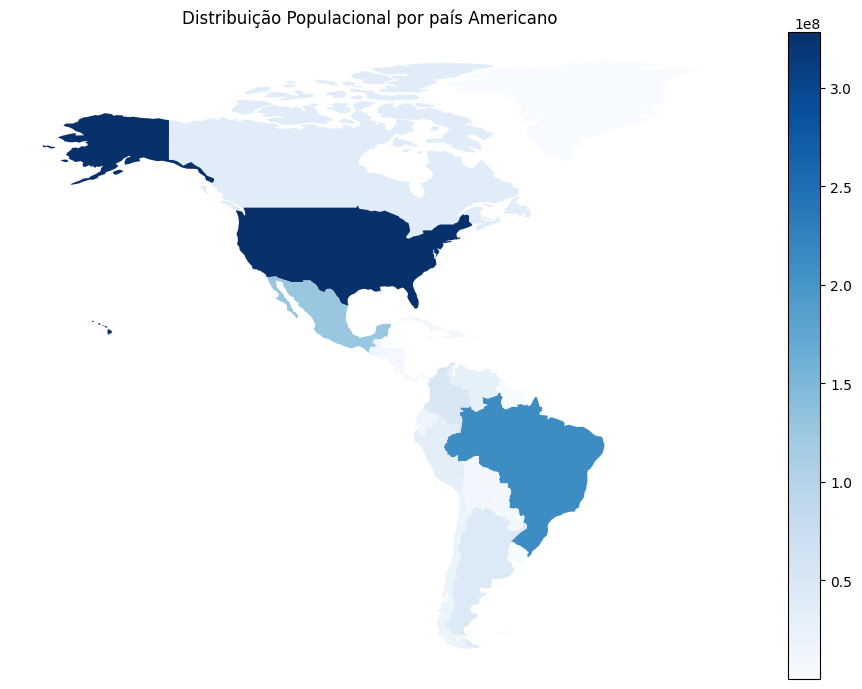

In [5]:
plot_color_scaled_map(gdf, "populacao", "Distribuição Populacional por país Americano")

Calculando o índice de Moran para a variável `população`:

In [6]:
moran_statics(gdf, "populacao")

Índice de Moran para Populacao: 0.13918092249268105
P-valor: 0.069


O índice de Moran obtido para a população foi de 0.139, indicando uma autocorrelação espacial positiva. Isso significa que países com alta população tendem a estar próximos de outros países com alta população, e o mesmo vale para países com baixa população.

Ademais, o p-value associado ao índice de Moran foi de 0.069, indicando que a autocorrelação observada é estatisticamente significativa, se considerarmos um nível de significância de 10%, ou seja, assumimos autocorrelação espacial para a população.

#### PIB por país

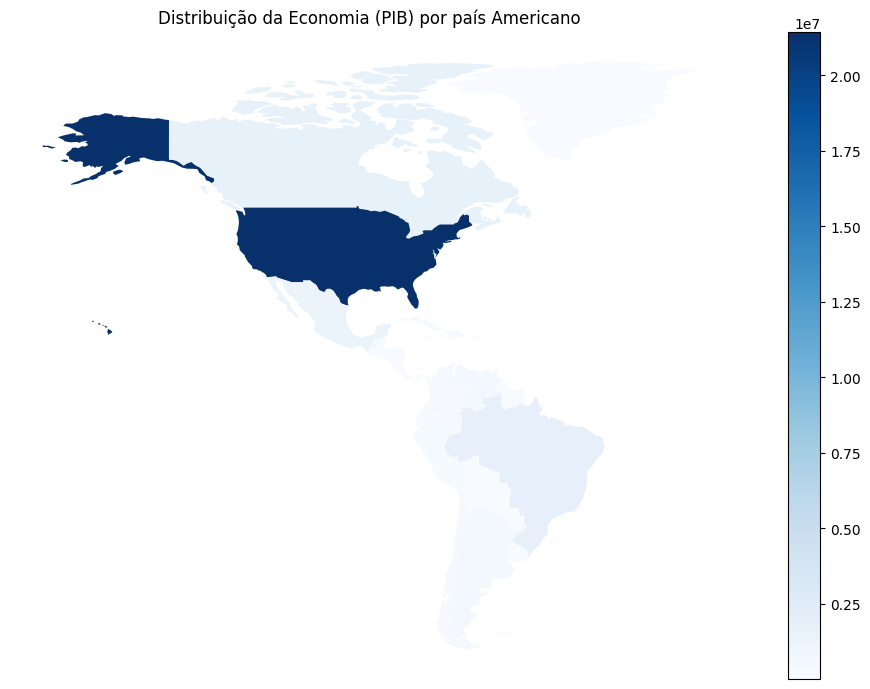

In [7]:
plot_color_scaled_map(gdf, "pib", "Distribuição da Economia (PIB) por país Americano")

In [8]:
moran_statics(gdf, "pib")

Índice de Moran para Pib: 0.1112959825428198
P-valor: 0.005


O índice e Moran para o PIB foi de 0.11, indicando uma autocorrelação espacial positiva. Isso significa que países com alto PIB tendem a estar próximos de outros países com alto PIB, e o mesmo vale para países com baixo PIB.

No caso do P-value, o valor foi de 0.005, muito menor que o 0.069 obtido para a população. Isso indica que a autocorrelação espacial observada para o PIB é estatisticamente significativa, se considerarmos um nível de significância extremamente baixo, como o de 1%.

#### PIB per capta por país

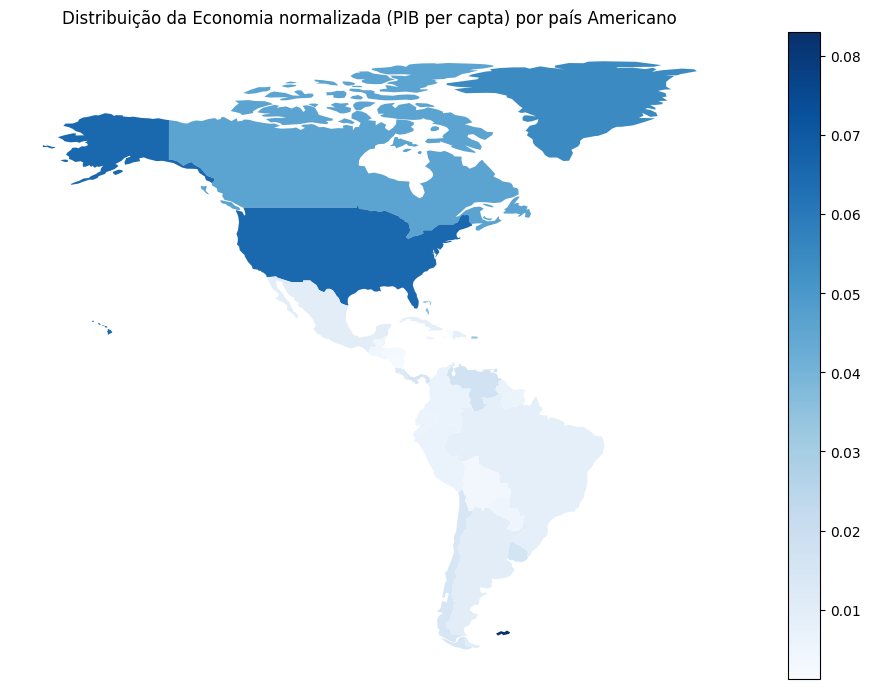

In [9]:
plot_color_scaled_map(
    gdf,
    "pib_per_capita",
    "Distribuição da Economia normalizada (PIB per capta) por país Americano",
)

In [10]:
moran_statics(gdf, "pib_per_capita")

Índice de Moran para Pib_per_capita: 0.40313872832451836
P-valor: 0.015


No caso do PIB per capta, o índice de Moran foi de 0.4, indicando uma autocorrelação espacial positiva e mais forte que no caso em que consideramos apenas a população ou o valor absoluto do PIB. Isso significa que países com alto PIB per capta tendem a estar próximos de outros países com alto PIB per capta, e o mesmo vale para países com baixo PIB per capta, fato que pode ser evidenciado pela observação do mapa acima.

No caso do p-value, o valor foi de 0.015, indicando que a autocorrelação espacial observada para o PIB per capta é estatisticamente significativa, se considerarmos um nível de significância de 5%. Logo, podemos assumir que há autocorrelação espacial para o PIB per capta.


---

## 4. Modelagem Preditiva com Dados Espaciais

Para análise preditiva, utilizaremos os modelos **Autoregressivo Espacial (SAR)** e **Regressão Geograficamente Ponderada (GWR)**, ambos adequados para capturar padrões em dados com dependência espacial.

### Modelo Autoregressivo Espacial (SAR)

O **Modelo SAR** assume que existe uma dependência espacial entre as observações próximas. Ele usa uma matriz de pesos espaciais para modelar a influência dos valores vizinhos em uma observação.

- **Fórmula do Modelo SAR**: $ Y = \rho WY + X\beta + \varepsilon $
  - $Y$: variável dependente.
  - $\rho$: coeficiente autorregressivo espacial.
  - $W$: matriz de pesos espaciais.
  - $X$: variáveis independentes.
  - $\beta$: coeficientes de regressão.

#### Exemplo com o Modelo SAR

In [11]:
from spreg import ML_Error
import numpy as np

# Variáveis dependente e independente
y = np.array(gdf["populacao"]).reshape(-1, 1)
X = np.array(gdf["pib"]).reshape(-1, 1)

w = Queen.from_dataframe(gdf)

# Ajustar o modelo SAR
sar_model = ML_Error(y, X, w)
print("Coeficientes SAR:")
print(f"rho: {sar_model.betas[0][0]}")
print(f"betas: {sar_model.betas[1:].flatten()}")

Coeficientes SAR:
rho: 26759695.98428175
betas: [15.50118507 -0.1154221 ]


Neste exemplo, o modelo ajusta:
- **PIB** como variável independente (preditor)
- **população** como variável dependente.

Os coeficientes beta do SAR representam o grau de dependência espacial.

Como obtivemos os valores
```shell
Coeficientes SAR:
rho: 26759695.98428175
betas: [15.50118507, -0.1154221]
```

Podemos interpretar que:

1. **rho**: `26759695.98`
   - Esse valor **positivo e elevado de rho** implica uma **forte autocorrelação espacial positiva** na variável população.
     - Em outras palavras, áreas com populações altas tendem a estar próximas de outras áreas também com populações altas, e áreas de baixa população se agrupam da mesma forma.
     - Essa dependência espacial positiva indica que a densidade populacional não está distribuída de maneira aleatória, mas tende a formar agrupamentos.


2. **betas**:
   - **Intercepto (beta[0])**: `15.50`
     - Este valor indica o nível base esperado da população quando o PIB é zero.
       - Como PIB zero pode não ser realista, este valor serve mais como um ponto de referência do que uma interpretação literal.
   - **Coeficiente do PIB**:
     -  beta[1]: `-0.1154`
       - O coeficiente negativo do PIB sugere uma **relação inversa** com a população.
       - Isso significa que, em média, conforme o PIB aumenta uma unidade, a população tende a diminuir em `0.1154` unidades, mantendo os efeitos espaciais constantes.
       - Essa relação negativa pode indicar que áreas com PIB mais alto não são necessariamente as mais populosas, talvez devido a centros econômicos menores, porém com uma produção econômica maior.

Resumindo:
- A **população tende a formar agrupamentos** espacialmente, com áreas de densidade populacional semelhante próximas umas das outras, como indicado pelo alto valor positivo de rho.
- **Relação inversa entre PIB e população**: PIB mais alto está associado a uma ligeira redução na população. Essa relação pode refletir fatores demográficos ou econômicos, como centros econômicos com menor densidade populacional, mas alta produção econômica.

## 5. Exercícios

### 1. Normalizando os Dados

Repita os passos anteriores, mas agora utilizando os dados normalizados, i.e., subtraindo a média e dividindo pelo desvio padrão.

Podemos obter tal processo com o método `StandardScaler` do `sklearn.preprocessing`.


Exemplo de normalização dos dados:

```python
from sklearn.preprocessing import StandardScaler

df_norm = df.copy()
scaler = StandardScaler()
df_norm[['população', 'PIB', 'PIB per capta']] = scaler.fit_transform(df[['população', 'PIB', 'PIB per capta']])

```

In [12]:
# Solução

Houve diferença nos resultados obtidos após a normalização dos dados? Explique.

### 2. Adicionando mais dimensões aos dados

Vamos agora repetir o processo, mas considerando um novo processo de modelagem:
- Variável dependente: **pib_per_capita**
- Variáveis independentes: **população** e **pib**.

In [13]:
# Solução

Qual a interpretação dos coeficientes obtidos para o modelo SAR?

### 3. Mais dimensões e normalização

Vamos agora repetir o processo anterior, mas considerando os dados normalizados.

In [14]:
# Solução

Houve diferença nos resultados obtidos após a normalização dos dados? Explique.